![image](https://github.com/user-attachments/assets/09bc4302-ab25-4ec0-971b-5732b28a5ef7)



# Day 3 - 100 Days of Data Science
**[Github Repo](https://github.com/sushant097/100Days__DataScience?tab=readme-ov-file)**

 In this notebook we will clean data, engineered relevant features, performed exploratory data analysis, apply K-Means clustering, and analyzed the resulting customer segments.

In [1]:
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Step 1: Load and Explore the Data
First, you need to load the data from the provided Excel file and explore its structure.

In [2]:
data = pd.read_excel("/kaggle/input/online-retail-dataset/online_retail_II.xlsx")

In [3]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


The dataset contain information on retail transactions. Here are the columns in the data:

- **Invoice**: The invoice number associated with the transaction.
- **StockCode**: The code of the product.
- **Description**: A description of the product.
- **Quantity**: The number of units of the product purchased.
- **InvoiceDate**: The date and time of the transaction.
- **Price**: The price per unit of the product.
- **Customer ID**: A unique identifier for the customer.
- **Country**: The country where the transaction took place.

Let's see some information of dataset. 

In [4]:
# describe data
data.describe(include="all")

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,525461.0,525461,522533,525461.000000,525461,525461.000000,417534.000000,525461
unique,28816.0,4632,4681,NaN,NaN,NaN,NaN,40
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,675.0,3516,3549,NaN,NaN,NaN,NaN,485852
mean,NaN,NaN,NaN,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478,NaN
min,NaN,NaN,NaN,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2010-03-21 12:20:00,1.250000,13983.000000,NaN
50%,NaN,NaN,NaN,3.000000,2010-07-06 09:51:00,2.100000,15311.000000,NaN
75%,NaN,NaN,NaN,10.000000,2010-10-15 12:45:00,4.210000,16799.000000,NaN
max,NaN,NaN,NaN,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000,NaN


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


**I think with this dataset we can perform customer segmentation or clustering**.

# Step 2: Data Cleaning
The dataset may contain missing values, duplicates, or irrelevant columns. Let's clean it up.

In [6]:
data.drop_duplicates(inplace=True)

# Remove rows with missing values
data.dropna(inplace=True)

# Convert the necessary columns to the appropriate data types if needed
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Drop any irrelevant columns if necessary (e.g., 'Country' if not needed)
data = data.drop(['Country'], axis=1)

# Step 3: Feature Engineering
Create relevant features that will help in the clustering process. For instance, you can calculate the total amount spent by each customer.


In [7]:
# Create a 'TotalPrice' column
data['TotalPrice'] = data['Quantity'] * data['Price']

# Group by CustomerID to get the total amount spent, number of orders, and average price
customer_data = data.groupby('Customer ID').agg({
    'TotalPrice': 'sum',
    'Invoice': 'nunique',
    'Quantity': 'sum'
}).rename(columns={
    'TotalPrice': 'TotalSpent',
    'Invoice': 'NumOrders ',
    'Quantity': 'TotalQuantity'
})

# Reset index
customer_data = customer_data.reset_index()

# Display the customer_df
customer_data.head()

,Customer ID,TotalSpent,NumOrders,TotalQuantity
0,12346.0,-51.74,15,53
1,12347.0,1323.32,2,828
2,12348.0,222.16,1,373
3,12349.0,2646.99,4,988
4,12351.0,300.93,1,261


In [8]:
customer_data.columns

Index(['Customer ID', 'TotalSpent', 'NumOrders ', 'TotalQuantity'], dtype='object')


# Step 4: Exploratory Data Analysis (EDA) with Seaborn
Now, visualize the data to understand the distribution and relationships between features.


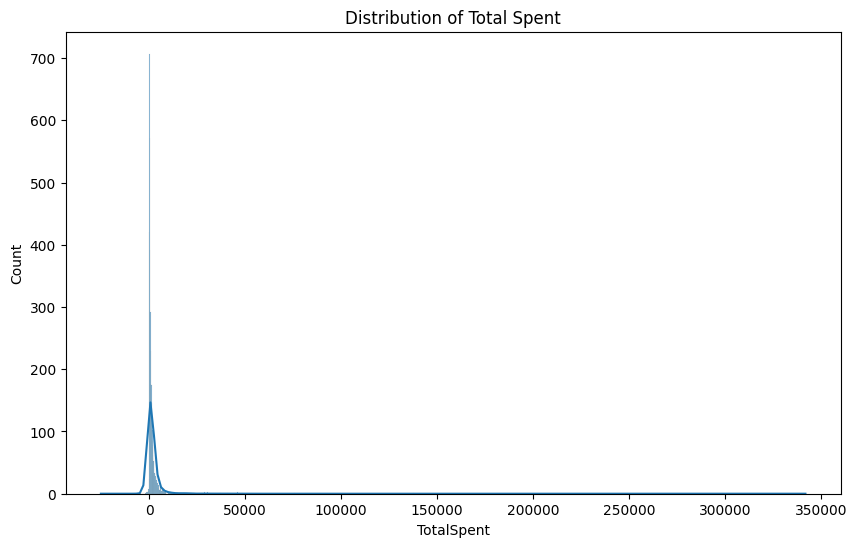

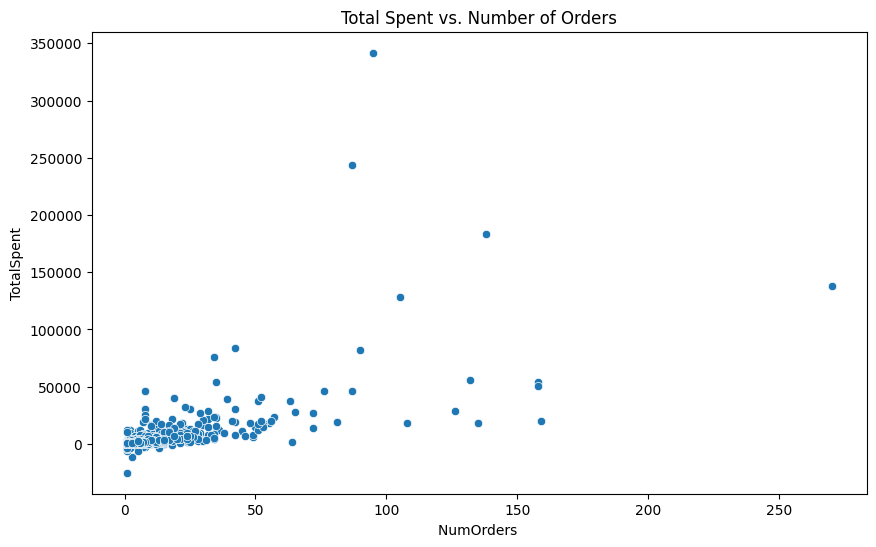

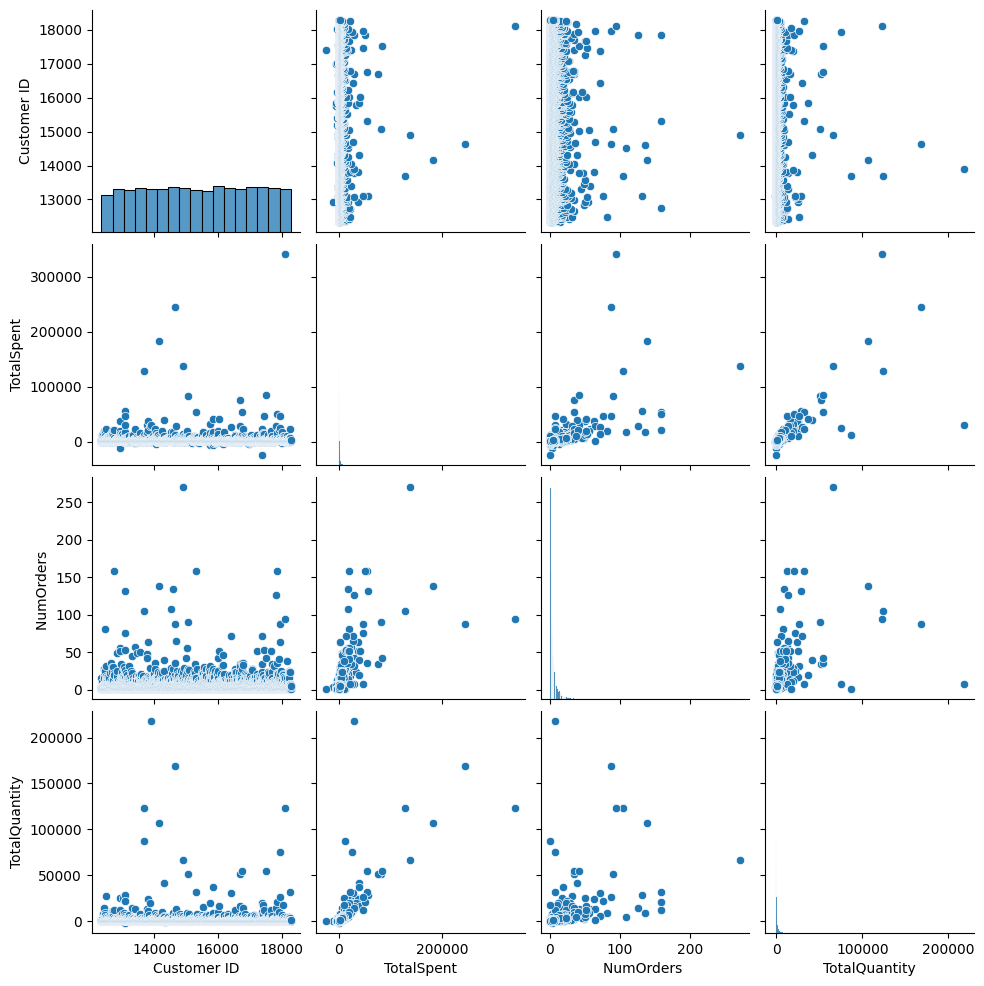

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of TotalSpent
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['TotalSpent'], kde=True)
plt.title('Distribution of Total Spent')
plt.show()

# Plot the relationship between TotalSpent and NumOrders
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='NumOrders ', y='TotalSpent')
plt.title('Total Spent vs. Number of Orders')
plt.show()

# Pairplot to see relationships between features
sns.pairplot(customer_data)
plt.show()



# Step 5: Normalize the Data
Before clustering, it's a good practice to normalize the data so that each feature contributes equally to the distance calculations.



In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Normalize the data
scaled_features = scaler.fit_transform(customer_data[['TotalSpent', 'NumOrders ', 'TotalQuantity']])

# Convert scaled features back to DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=['TotalSpent', 'NumOrders ', 'TotalQuantity'])

# Step 6: Apply K-Means Clustering
Now, let's apply K-Means clustering to segment the customers.


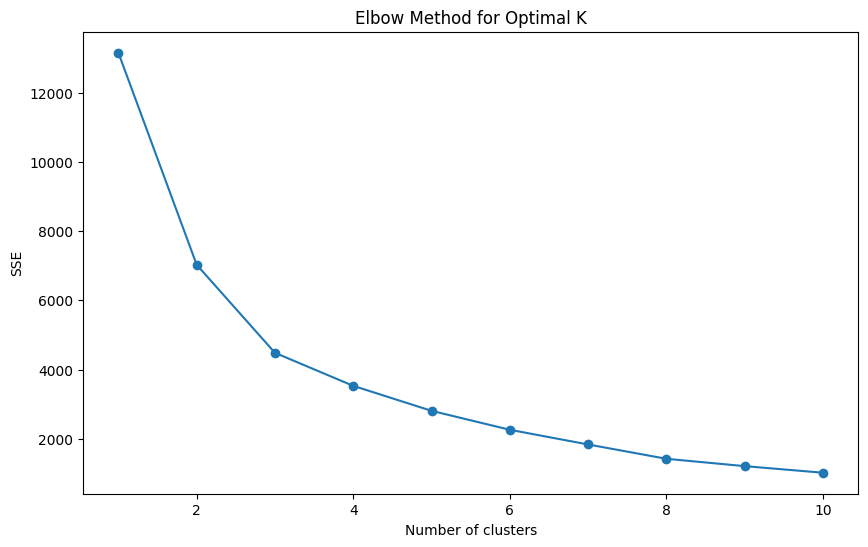

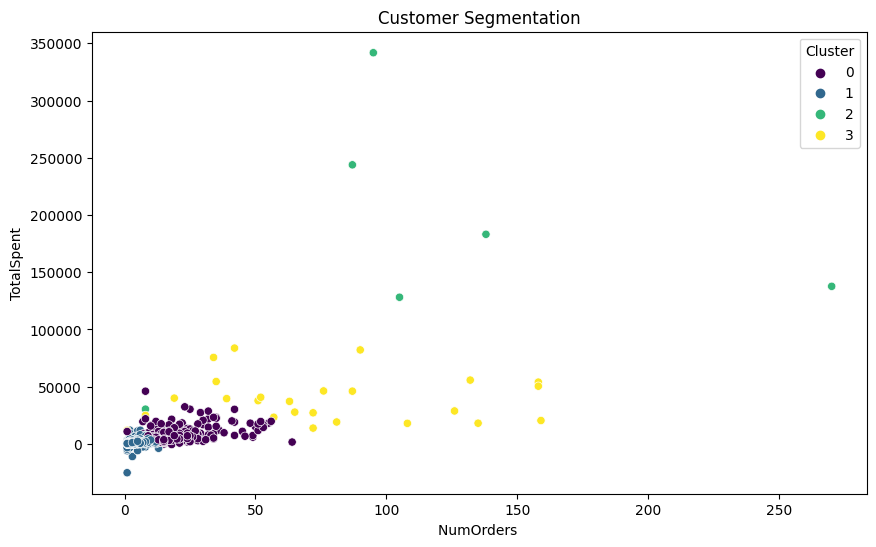

In [11]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Apply K-Means with the optimal number of clusters (e.g., 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='NumOrders ', y='TotalSpent', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.show()


# Step 7: Analyze the Clusters
Finally, analyze the characteristics of each cluster.


In [12]:
# Group by cluster to see the average characteristics of each cluster
cluster_summary = customer_data.groupby('Cluster').agg({
    'TotalSpent': 'mean',
    'NumOrders ': 'mean',
    'TotalQuantity': 'mean',
    'Customer ID': 'count'
}).rename(columns={'Customer ID': 'NumCustomers'})

# Display the cluster summary
cluster_summary

,TotalSpent,NumOrders,TotalQuantity,NumCustomers
Cluster,,,,
0,6581.619557,18.654762,3844.835714,420
1,891.947451,3.339013,540.819685,3932
2,177514.628333,117.166667,134445.500000,6
3,39134.008880,76.800000,30423.400000,25



# Conclusion:
In this step-by-step guide, we have loaded the dataset, cleaned it, engineered relevant features, performed exploratory data analysis, applied K-Means clustering, and analyzed the resulting customer segments. This process will allow  to uncover insights about customer behavior and create strategies for targeted marketing.
